In [2]:
path = '/kaggle/input/web-server-access-logs/access.log'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install drain3

  Preparing metadata (setup.py) ... done
  Created wheel for drain3: filename=drain3-0.9.11-py3-none-any.whl size=23998 sha256=3c925179a9b5d08e30bc9dd89f71da193a2b5e556ba14d4f10fd1b73e0ff44a4
  Stored in directory: /root/.cache/pip/wheels/96/3f/bb/c2df80298168b46a45654266ac0c139220540689a17463e3cf
Successfully built drain3
  Attempting uninstall: jsonpickle
    Found existing installation: jsonpickle 4.0.5
    Uninstalling jsonpickle-4.0.5:
      Successfully uninstalled jsonpickle-4.0.5
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.5.2
    Uninstalling cachetools-5.5.2:
      Successfully uninstalled cachetools-5.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.1 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have no

In [5]:
import re
from drain3 import TemplateMiner
from drain3.template_miner_config import TemplateMinerConfig
from drain3.file_persistence import FilePersistence
import json

# Regex
log_pattern = re.compile(
    r'(?P<ip>\S+)\s+'
    r'(?P<logname>\S+)\s+'
    r'(?P<user>\S+)\s+'
    r'\[(?P<timestamp>[^\]]+)\]\s+'
    r'"(?:(?P<method>[A-Z]+)\s+(?P<url>[^\s"]*)\s+(?P<protocol>[^"]*)|[^"]*)"\s+'
    r'(?P<status>\d{3}|-)\s+'
    r'(?P<size>\d+|-)\s+'
    r'"(?P<referrer>[^"]*)"\s+'
    r'"(?P<user_agent>[^"]*)"'
)

config = TemplateMinerConfig()
config.profiling_enabled = False
config.drain_depth = 4
config.similarity_threshold = 0.4
config.max_children = 100

persistence = FilePersistence("drain3_state.json")
template_miner = TemplateMiner(persistence, config)
# Xử lý từng dòng log
parsed_logs = []

with open(path, "r", encoding="utf-8") as f: 
    for line in f:
        line = line.strip()

        match = log_pattern.match(line)
        if not match:
            continue  
        log_fields = match.groupdict()

        result = template_miner.add_log_message(line)

        log_fields["drain3_template"] = result["template_mined"] if result else None
        log_fields["event_id"] = result["cluster_id"] if result else None
        parsed_logs.append(log_fields)

In [6]:
import pandas as pd
df = pd.DataFrame(parsed_logs)
df.to_csv("parsed_log.csv", index=False)

In [7]:
df

,ip,logname,user,timestamp,method,url,protocol,status,size,referrer,user_agent,drain3_template,event_id
0,54.36.149.41,-,-,22/Jan/2019:03:56:14 +0330,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,HTTP/1.1,200,30577,-,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...,54.36.149.41 - - [22/Jan/2019:03:56:14 +0330] ...,1
1,31.56.96.51,-,-,22/Jan/2019:03:56:16 +0330,GET,/image/60844/productModel/200x200,HTTP/1.1,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,"31.56.96.51 - - [22/Jan/2019:03:56:16 +0330] ""...",2
2,31.56.96.51,-,-,22/Jan/2019:03:56:16 +0330,GET,/image/61474/productModel/200x200,HTTP/1.1,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,"31.56.96.51 - - [22/Jan/2019:03:56:16 +0330] ""...",2
3,40.77.167.129,-,-,22/Jan/2019:03:56:17 +0330,GET,/image/14925/productModel/100x100,HTTP/1.1,200,1696,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,"<*> - - <*> +0330] ""GET <*> HTTP/1.1"" 200 <*> ...",1
4,91.99.72.15,-,-,22/Jan/2019:03:56:17 +0330,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,HTTP/1.1,200,41483,-,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...,"91.99.72.15 - - [22/Jan/2019:03:56:17 +0330] ""...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10365147,188.229.21.56,-,-,26/Jan/2019:20:29:13 +0330,GET,/content/view/shoppingRules,HTTP/1.1,302,0,https://www.zanbil.ir/m/product/32106/62372/%D...,Mozilla/5.0 (Linux; Android 7.0; SM-N920C Buil...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",2
10365148,5.127.220.71,-,-,26/Jan/2019:20:29:13 +0330,GET,/apple-touch-icon-120x120.png,HTTP/1.1,404,32420,-,MobileSafari/604.1 CFNetwork/976 Darwin/18.2.0,"<*> - - <*> +0330] ""GET <*> HTTP/1.1"" <*> <*> ...",11
10365149,5.213.7.50,-,-,26/Jan/2019:20:29:13 +0330,GET,/m/product/18962/%D8%BA%D8%B0%D8%A7-%D8%B3%D8%...,HTTP/1.1,200,20959,https://www.google.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",13
10365150,109.125.169.52,-,-,26/Jan/2019:20:29:13 +0330,GET,/image/%7B%7BbasketItem.id%7D%7D?type=productM...,HTTP/1.1,200,5,https://www.zanbil.ir/,Mozilla/5.0 (Windows NT 6.1; rv:64.0) Gecko/20...,"<*> - - <*> +0330] <*> <*> <*> <*> <*> <*> ""Mo...",334


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365152 entries, 0 to 10365151
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ip               object
 1   logname          object
 2   user             object
 3   timestamp        object
 4   method           object
 5   url              object
 6   protocol         object
 7   status           object
 8   size             object
 9   referrer         object
 10  user_agent       object
 11  drain3_template  object
 12  event_id         int64 
dtypes: int64(1), object(12)
memory usage: 1.0+ GB


In [9]:
df.describe()

,event_id
count,1.036515e+07
mean,1.086086e+02
std,1.174383e+02
min,1.000000e+00
25%,9.000000e+00
50%,5.300000e+01
75%,2.400000e+02
max,4.060000e+02


In [10]:
df.shape

(10365152, 13)

Text(0.5, 1.0, 'Top 10 Frequent Log Templates (event_id)')

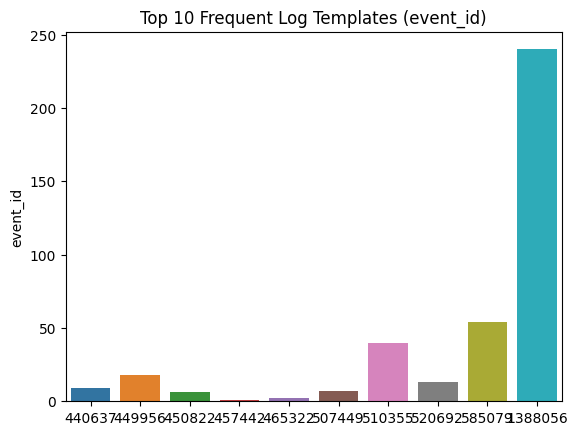

In [11]:
top_event_ids = df['event_id'].value_counts().head(10)
sns.barplot(x=top_event_ids.values, y=top_event_ids.index)
plt.title("Top 10 Frequent Log Templates (event_id)")

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df["event_id"] == 4695])

Empty DataFrame
Columns: [ip, logname, user, timestamp, method, url, protocol, status, size, referrer, user_agent, drain3_template, event_id]
Index: []


In [13]:
df.describe()

,event_id
count,1.036515e+07
mean,1.086086e+02
std,1.174383e+02
min,1.000000e+00
25%,9.000000e+00
50%,5.300000e+01
75%,2.400000e+02
max,4.060000e+02


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365152 entries, 0 to 10365151
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ip               object
 1   logname          object
 2   user             object
 3   timestamp        object
 4   method           object
 5   url              object
 6   protocol         object
 7   status           object
 8   size             object
 9   referrer         object
 10  user_agent       object
 11  drain3_template  object
 12  event_id         int64 
dtypes: int64(1), object(12)
memory usage: 1.0+ GB


In [15]:
df.isna().sum() / len(df) * 100

ip                 0.000000
logname            0.000000
user               0.000000
timestamp          0.000000
method             0.000733
url                0.000733
protocol           0.000733
status             0.000000
size               0.000000
referrer           0.000000
user_agent         0.000000
drain3_template    0.000000
event_id           0.000000
dtype: float64

In [18]:
from IPython.display import FileLink
FileLink('parsed_log.csv')

/kaggle/working/parsed_log.csv